In [1]:
from benchmark.data.datasets import ClassificationDataset

In [2]:
# 0) Ensure repo on your path
import sys
from pathlib import Path

# assume this notebook lives in notebooks/, so parent() is the repo root
sys.path.append(str(Path().resolve().parent))
from paths import PROJECT_ROOT

# point to your data
DATA_DIR    = PROJECT_ROOT / "data" / "massspecgym"
ORIG_MGF    = DATA_DIR  / "MassSpecGym.mgf"
LABELED_MGF = DATA_DIR  / "MassSpecGym_ringcount.mgf"

In [3]:
# 1) Imports
import torch
import pytorch_lightning as pl

from rdkit import Chem
from massspecgym.data.transforms import SpecTokenizer

# Use the new multi-class dataset
from benchmark.data.datasets import ClassificationDataset
from benchmark.data.data_module import BenchmarkDataModule


In [4]:
# 2) Define your multi-class label function
def ring_count_class(row):
    smiles = row.get("smiles", "")
    mol    = Chem.MolFromSmiles(smiles) if smiles else None
    num_rings = len(mol.GetRingInfo().AtomRings()) if mol else 0
    # class 0 = no rings, 1 = one ring, 2 = two or more
    return 0 if num_rings == 0 else 1 if num_rings == 1 else 2

In [5]:
# 3) Annotate MGF (will skip if already done)
ClassificationDataset.annotate_mgf(
    input_pth  = ORIG_MGF,
    output_pth = LABELED_MGF,
    label_fn   = ring_count_class
)

/Users/macbook/CODE/DreaMS_MIMB/data/massspecgym/MassSpecGym_ringcount.mgf exists; skipping.


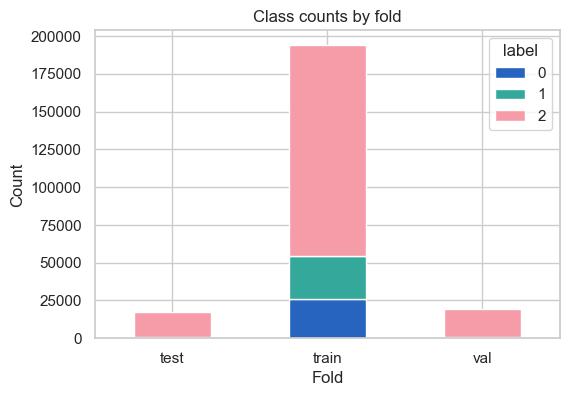

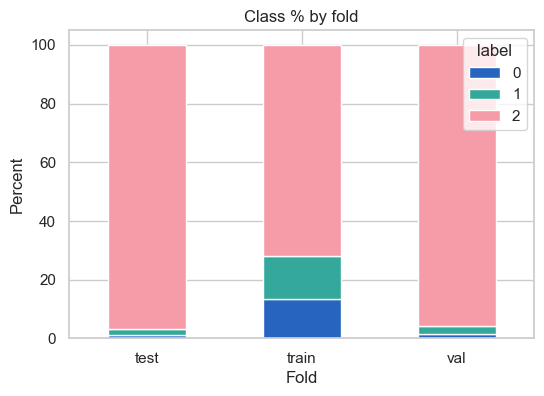

In [6]:
# 4) Inspect fold‐wise distribution
ClassificationDataset.plot_fold_distribution(LABELED_MGF)


=== Example for class 0 ===


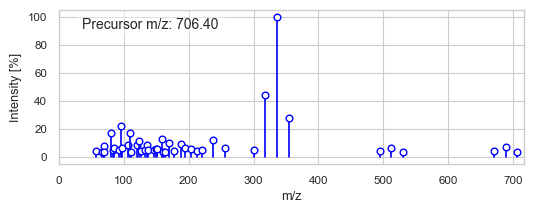

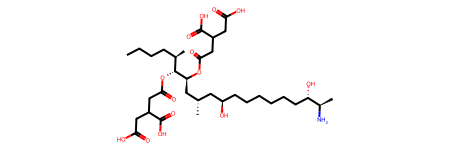

{'identifier': 'MassSpecGymID0000273', 'smiles': 'CCCC[C@@H](C)[C@H]([C@H](C[C@@H](C)C[C@@H](CCCCCC[C@@H]([C@@H](C)N)O)O)OC(=O)CC(CC(=O)O)C(=O)O)OC(=O)CC(CC(=O)O)C(=O)O', 'inchikey': 'CPCRJSQNWHCGOP', 'formula': 'C34H59NO14', 'precursor_formula': 'C34H60NO14', 'parent_mass': '705.393024', 'precursor_mz': 706.4003, 'adduct': '[M+H]+', 'instrument_type': 'Orbitrap', 'collision_energy': '30.0', 'fold': 'val', 'simulation_challenge': 'True', 'label': 0}

=== Example for class 1 ===


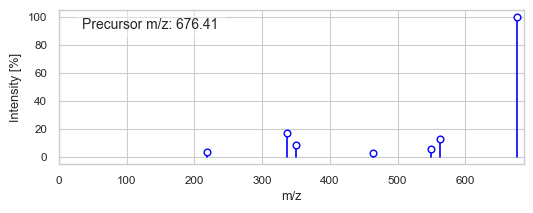

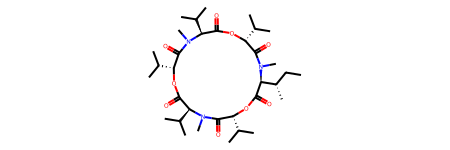

{'identifier': 'MassSpecGymID0000089', 'smiles': 'CC[C@H](C)[C@H]1C(=O)O[C@@H](C(=O)N([C@H](C(=O)O[C@@H](C(=O)N([C@H](C(=O)O[C@@H](C(=O)N1C)C(C)C)C(C)C)C)C(C)C)C(C)C)C)C(C)C', 'inchikey': 'UQCSETXJXJTMKO', 'formula': 'C34H59N3O9', 'precursor_formula': 'C34H59N3NaO9', 'parent_mass': '653.424582', 'precursor_mz': 676.4138, 'adduct': '[M+Na]+', 'instrument_type': 'Orbitrap', 'collision_energy': '35.0', 'fold': 'train', 'simulation_challenge': 'False', 'label': 1}

=== Example for class 2 ===


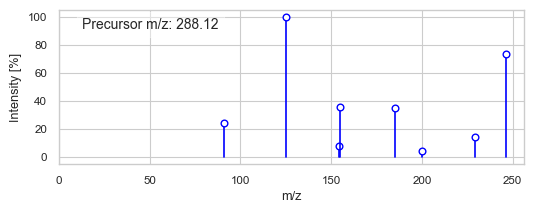

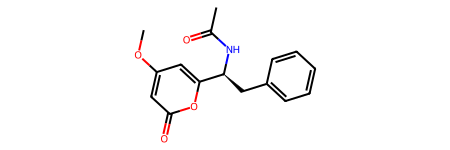

{'identifier': 'MassSpecGymID0000001', 'smiles': 'CC(=O)N[C@@H](CC1=CC=CC=C1)C2=CC(=CC(=O)O2)OC', 'inchikey': 'VFMQMACUYWGDOJ', 'formula': 'C16H17NO4', 'precursor_formula': 'C16H18NO4', 'parent_mass': '287.115224', 'precursor_mz': 288.1225, 'adduct': '[M+H]+', 'instrument_type': 'Orbitrap', 'collision_energy': '30.0', 'fold': 'train', 'simulation_challenge': 'True', 'label': 2}


In [7]:
# 5) Visualize one example per class
ClassificationDataset.visualize_examples(
    mgf_pth    = LABELED_MGF,
    smiles_key = 'smiles'   # or 'library_SMILES'
)